In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.io import loadmat
import utils
grader = utils.Grader()

In [0]:
input_layer_size  = 400
num_labels = 10

training_data = loadmat('/content/drive/My Drive/ex3data1.mat')
X = training_data['X']
y = training_data['y']
y[y==10] = 0
m = y.shape[0]

In [0]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

[4848 3075 1731 3500 3441 3796 3271  300 1789  583 4643 3073 2712 2294
  823 1305  352 4324 1147 3412 1106  725 4960 1489 2608   20 4399 1158
 4237  131 4347 1348 4175  967 4498 4679 2093 3504 2450 3708 1374 4018
   84 3741 4902 4722 4727 4203 1436 2066  309 2035  710 1746 3421   18
 2131 2869 4207 1217 3115 3811 1135 1524 3909 4337 3098 4448 3701 1712
 4924   98 3244 3757  490 3458 3240 4428  726 1655 4294 4943  956 2256
  281 1680 3112 1942 2864 3951 3617 2548 4993 2903 1544 2456 1998 4170
 1069 1082]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


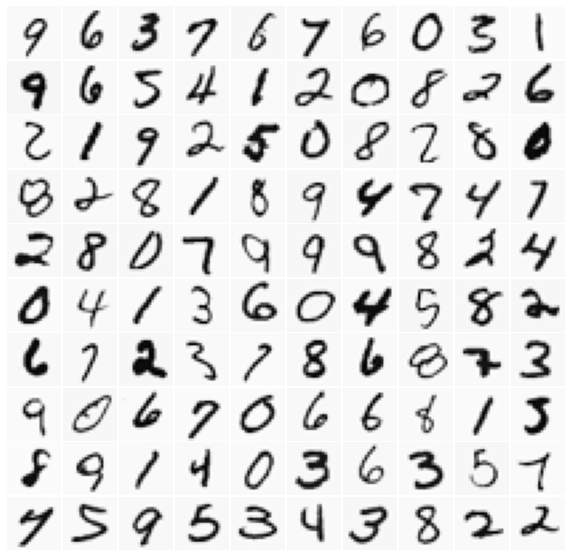

In [0]:
rand_indices = np.random.choice(m, 100, replace=False)
print(rand_indices)
print(X)
sel = X[rand_indices, :]
displayData(sel)

In [0]:
# test values for the parameters theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# test values for the inputs
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# test values for the labels
y_t = np.array([1, 0, 1, 0, 1])

# test value for the regularization parameter
lambda_t = 3

In [0]:
import math
def sigmoid(z):
  h_x = 1/(1 + (math.pow(math.e,-z)))
  return h_x

In [0]:
def lrCostFunction(theta, X, y, lambda_):
  m = y.size
  J = 0
  grad = np.zeros(theta.shape)
  if y.dtype == bool:
        y = y.astype(int)
  def theta_sums(theta):
    sums = 0
    for i in range(1,theta.shape[0]):
      sums += theta[i]*theta[i]
    return (sums*lambda_)/(2*m)

  def computeCost(x,y):
    sum_diff = 0
    for i in range(m):
      h_x = sigmoid(np.dot(theta,x[i]))
      sum_diff += -y[i]*math.log(h_x) - (1-y[i])*math.log(1-h_x)
    
    return (sum_diff/m)
  
  def computeGrad(x,y,j):
    sum_Gradient = 0
    for i in range(m):
      h_x = sigmoid(np.dot(theta,x[i]))
      sum_Gradient += (h_x-y[i])*x[i][j]
    return sum_Gradient/m
  for i in range(grad.shape[0]):
    if i >= 1:
      grad[i] = computeGrad(X,y,i) + (theta[i]*lambda_)/m
    else:
      grad[i] = computeGrad(X,y,i)

  J = computeCost(X,y) + theta_sums(theta)
  
  return J,grad

In [0]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Cost         : {:.6f}'.format(J))
print('Expected cost: 2.534819')
print('-----------------------')
print('Gradients:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Expected gradients:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

Cost         : 2.534819
Expected cost: 2.534819
-----------------------
Gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]
Expected gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]


In [0]:
grader[1] = lrCostFunction
grader.grade()


Submitting Solutions | Programming Exercise multi-class-classification-and-neural-networks

Use token from last successful submission (advaith.maddipatla@gmail.com)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
            Regularized Logistic Regression |  30 /  30 | Nice work!
             One-vs-All Classifier Training |   0 /  20 | 
           One-vs-All Classifier Prediction |   0 /  20 | 
         Neural Network Prediction Function |   0 /  30 | 
                                  --------------------------------
                                            |  30 / 100 |  



In [0]:
def oneVsAll(X, y, num_labels, lambda_):
  m, n = X.shape
  all_theta = np.zeros((num_labels, n + 1))
  X = np.concatenate([np.ones((m, 1)), X], axis=1)
  options = {'maxiter': 50}
  initial_theta = np.zeros(n + 1)
  for i in range(num_labels):
    res = optimize.minimize(lrCostFunction, 
                                initial_theta, 
                                (X, (y == i), lambda_), 
                                jac=True, 
                                method='TNC',
                                options=options)
    all_theta[i] = res.x
  return all_theta

In [0]:
lambda_ = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_)

KeyboardInterrupt: ignored

In [0]:
grader[2] = oneVsAll
grader.grade()


Submitting Solutions | Programming Exercise multi-class-classification-and-neural-networks

Use token from last successful submission (advaith.maddipatla@gmail.com)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
            Regularized Logistic Regression |  30 /  30 | Nice work!
             One-vs-All Classifier Training |  20 /  20 | Nice work!
           One-vs-All Classifier Prediction |   0 /  20 | 
         Neural Network Prediction Function |   0 /  30 | 
                                  --------------------------------
                                            |  50 / 100 |  



In [0]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    # You need to return the following variables correctly 
    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(utils.sigmoid(X.dot(all_theta.T)), axis = 1)
    return p

In [0]:
grader[3] = predictOneVsAll
grader.grade()


Submitting Solutions | Programming Exercise multi-class-classification-and-neural-networks

Use token from last successful submission (advaith.maddipatla@gmail.com)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
            Regularized Logistic Regression |  30 /  30 | Nice work!
             One-vs-All Classifier Training |  20 /  20 | Nice work!
           One-vs-All Classifier Prediction |  20 /  20 | Nice work!
         Neural Network Prediction Function |   0 /  30 | 
                                  --------------------------------
                                            |  70 / 100 |  



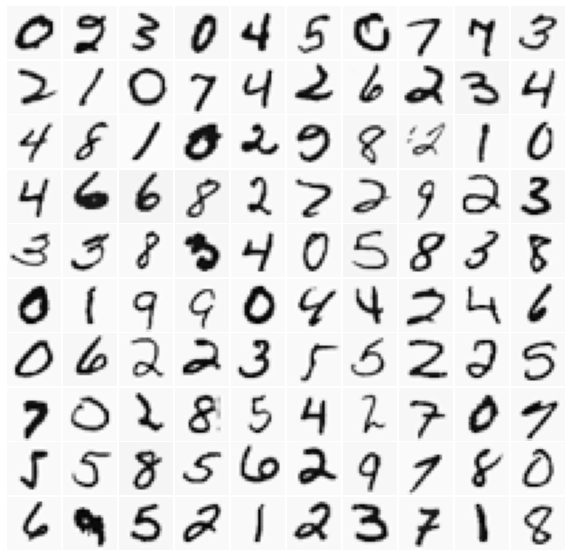

In [0]:
data = loadmat('/content/drive/My Drive/ex3data1.mat')
X = data['X']
y = data['y'].ravel()
y[y==10] = 0

m = y.shape[0]
indices = np.random.permutation(m)

# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

displayData(sel)

In [0]:
input_layer_neurons = 400
hidden_layer_neurons = 25
labels = 10 # output units

weights = loadmat('/content/drive/My Drive/ex3weights.mat')
theta1, theta2 = weights['Theta1'],weights['Theta2']
theta2 = np.roll(theta2, 1, axis=0)

In [0]:
def predict(Theta1, Theta2, X):
  if X.ndim == 1:
    X = X[None]
  
  m = X.shape[0]
  num_labels = Theta2.shape[0]
  p = np.zeros(X.shape[0])
  X = np.concatenate([np.ones((m, 1)), X], axis=1)
  a_2 = utils.sigmoid(X.dot(Theta1.T))
  a_2 = np.concatenate([np.ones((a_2.shape[0], 1)), a_2], axis=1)

  a_3 = utils.sigmoid(a_2.dot(Theta2.T))

  p = np.argmax(utils.sigmoid(a_2.dot(Theta2.T)), axis = 1)

  return p

In [0]:
pred = predict(theta1, theta2, X)
print('Training Set Accuracy: {:.1f}%'.format(np.mean(pred == y) * 100))

Training Set Accuracy: 97.5%


Neural Network Prediction: 9


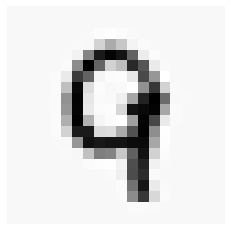

In [0]:
if indices.size > 0:
    i, indices = indices[0], indices[1:]
    utils.displayData(X[i, :], figsize=(4, 4))
    pred = predict(theta1, theta2, X[i, :])
    print('Neural Network Prediction: {}'.format(*pred))
else:
    print('No more images to display!')


In [0]:
grader[4] = predict
grader.grade()


Submitting Solutions | Programming Exercise multi-class-classification-and-neural-networks

Use token from last successful submission (advaith.maddipatla@gmail.com)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
            Regularized Logistic Regression |  30 /  30 | Nice work!
             One-vs-All Classifier Training |  20 /  20 | Nice work!
           One-vs-All Classifier Prediction |  20 /  20 | Nice work!
         Neural Network Prediction Function |  30 /  30 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  

